**Importing the libraries:**

In [1]:
import numpy as np
import scipy.io
from matplotlib import pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

Using TensorFlow backend.


**Loading the dataset into the environment:**

In [3]:
from google.colab import files

uploaded = files.upload()

# Data can be downloaded at http://ufldl.stanford.edu/housenumbers/

Saving train_32x32.mat to train_32x32.mat


**Extracting the data we need:**

In [0]:
mat = scipy.io.loadmat('train_32x32.mat')

mat = mat['X']
b, h, d, n = mat.shape

**Preprocessing the data:**

In [0]:
# Grayscale
img_gray = np.zeros(shape = (n, b * h))

def rgb2gray(rgb):
  return np.dot(rgb[..., :3], [0.299, 0.587, 0.114])

for i in range(n):
  # Convert to grayscale
  img = rgb2gray(mat[:, :, :, i])
  img = img.reshape(1, 1024)
  img_gray[i, :] = img

# Normalize
X_train = img_gray / 255.

**Defining the autoencoder network architecture:**

In [7]:
img_size = X_train.shape[1]

model = Sequential()
model.add(Dense(256, input_dim = img_size, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))

model.add(Dense(64, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(img_size, activation = 'sigmoid'))

opt = Adam()
model.compile(loss = 'binary_crossentropy', optimizer = opt)

Instructions for updating:
Colocations handled automatically by placer.


**Training the autoencoder:**

In [8]:
n_epochs = 100
batch_size = 512

model.fit(X_train, X_train, 
          epochs = n_epochs, 
          batch_size = batch_size,
          shuffle = True,
          validation_split = 0.2)

Instructions for updating:
Use tf.cast instead.
Train on 58605 samples, validate on 14652 samples
Epoch 1/100
58605/58605 [==============================] - 5s 87us/step - loss: 0.6597 - val_loss: 0.6345
Epoch 2/100
58605/58605 [==============================] - 2s 37us/step - loss: 0.6295 - val_loss: 0.6258
Epoch 3/100
58605/58605 [==============================] - 2s 37us/step - loss: 0.6262 - val_loss: 0.6256
Epoch 4/100
58605/58605 [==============================] - 2s 37us/step - loss: 0.6254 - val_loss: 0.6240
Epoch 5/100
58605/58605 [==============================] - 2s 38us/step - loss: 0.6243 - val_loss: 0.6235
Epoch 6/100
58605/58605 [==============================] - 2s 37us/step - loss: 0.6232 - val_loss: 0.6225
Epoch 7/100
58605/58605 [==============================] - 2s 38us/step - loss: 0.6225 - val_loss: 0.6225
Epoch 8/100
58605/58605 [==============================] - 2s 38us/step - loss: 0.6215 - val_loss: 0.6209
Epoch 9/100
58605/58605 [=============================

**Predicting on the training set:**

In [0]:
pred = model.predict(X_train)

**Plotting some of the original images and their decoded versions:**

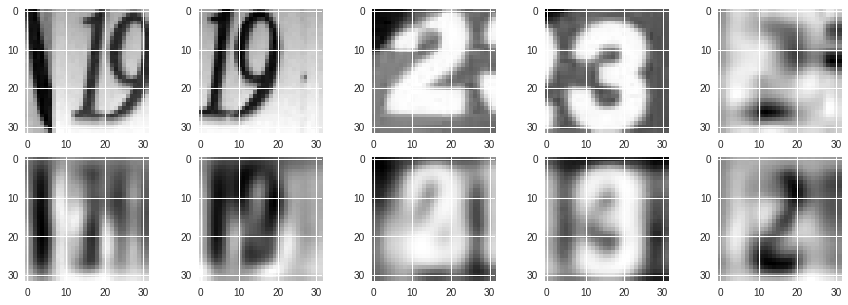

In [10]:
n = 5

plt.figure(figsize = (15, 5))
for i in range(n):
  
  # Plot original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(img_gray[i].reshape(32, 32), cmap = 'gray')
  
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(pred[i].reshape(32, 32), cmap = 'gray')
  
plt.show()